<a href="https://colab.research.google.com/github/SearingShot/StockPricePrediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

In [1]:
import yfinance as yf
import pandas as pd

sp500 = yf.Ticker("TATASTEEL.NS")

sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,5.301994,5.321976,5.236718,5.308654,10242229,0.0,0.0
1996-01-02 00:00:00+05:30,5.301993,5.321975,5.196752,5.210074,16954313,0.0,0.0
1996-01-03 00:00:00+05:30,5.210075,5.328638,5.196754,5.211408,13514114,0.0,0.0
1996-01-04 00:00:00+05:30,5.128814,5.128814,4.928989,5.046220,34785820,0.0,0.0
1996-01-05 00:00:00+05:30,4.984940,5.008919,4.895685,4.946307,30138033,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-28 00:00:00+05:30,144.050003,144.949997,140.050003,140.750000,20721926,0.0,0.0
2024-02-29 00:00:00+05:30,140.800003,141.850006,139.399994,140.850006,32248156,0.0,0.0
2024-03-01 00:00:00+05:30,143.000000,150.649994,143.000000,149.949997,123709943,0.0,0.0


<Axes: xlabel='Date'>

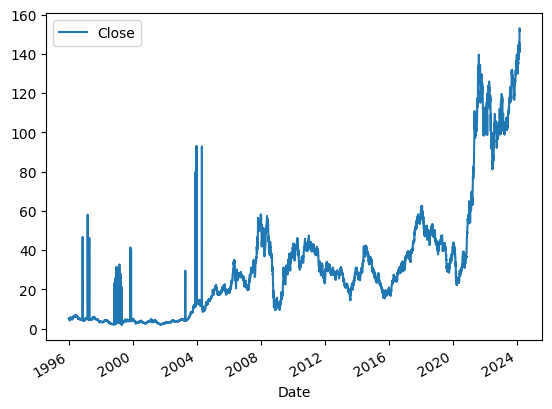

In [2]:
sp500.plot.line(y="Close", use_index=True)

In [3]:
# Deleting Unnecessary Columns
del sp500['Dividends']
del sp500['Stock Splits']

In [4]:
# Adding Tomorrow column , Which will have Closing price of next day
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [5]:
# Setting up our Target, where if in int it shows 1, that means that the price wentup, if 0 that would mean price went down.
sp500['Target'] = (sp500['Tomorrow']>sp500['Close']).astype(int)

In [6]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1996-01-01 00:00:00+05:30,5.301994,5.321976,5.236718,5.308654,10242229,5.210074,0
1996-01-02 00:00:00+05:30,5.301993,5.321975,5.196752,5.210074,16954313,5.211408,1
1996-01-03 00:00:00+05:30,5.210075,5.328638,5.196754,5.211408,13514114,5.046220,0
1996-01-04 00:00:00+05:30,5.128814,5.128814,4.928989,5.046220,34785820,4.946307,0
1996-01-05 00:00:00+05:30,4.984940,5.008919,4.895685,4.946307,30138033,4.761138,0
...,...,...,...,...,...,...,...
2024-02-28 00:00:00+05:30,144.050003,144.949997,140.050003,140.750000,20721926,140.850006,1
2024-02-29 00:00:00+05:30,140.800003,141.850006,139.399994,140.850006,32248156,149.949997,1
2024-03-01 00:00:00+05:30,143.000000,150.649994,143.000000,149.949997,123709943,153.100006,1


In [51]:
# only taking the data after 1990, as if we take larger set of data more variability will be there. Making it harder for our model to pickup on a trend.

# sp500 = sp500.loc["1990-01-01":].copy()

In [7]:
## We will be using RandomForest Model for couple of reasons:-
# Firstly They are Very Resistant to overfitting, i.e, chances of them overfitting is very low.
# Secondly They can pickup Non linear relation between the data.

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500,min_samples_split=100,random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=500, random_state=1)

In [8]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [9]:
import pandas as pd

preds = pd.Series(preds , index = test.index)

In [10]:
precision_score(test["Target"], preds)

0.625

In [11]:
combined = pd.concat([test["Target"], preds], axis =1)

<Axes: xlabel='Date'>

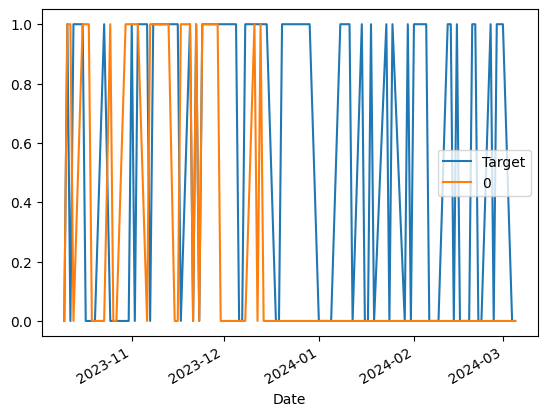

In [12]:
combined.plot()

In [13]:
def predict(train,test,predictors,model):
  pass
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index = test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis =1)
  return combined

In [14]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)
  # Concat takes a list of dataframe and combines them into a single dataframe

In [15]:
predictions = backtest(sp500, model, predictors)

In [16]:
predictions["Predictions"].value_counts()

0    2632
1    1951
Name: Predictions, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.504356740133265

In [18]:
predictions["Target"].value_counts()/ predictions.shape[0]

1    0.507528
0    0.492472
Name: Target, dtype: float64

In [19]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [20]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1996-01-01 00:00:00+05:30,5.301994,5.321976,5.236718,5.308654,10242229,5.210074,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-02 00:00:00+05:30,5.301993,5.321975,5.196752,5.210074,16954313,5.211408,1,0.990628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03 00:00:00+05:30,5.210075,5.328638,5.196754,5.211408,13514114,5.046220,0,1.000128,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04 00:00:00+05:30,5.128814,5.128814,4.928989,5.046220,34785820,4.946307,0,0.983896,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05 00:00:00+05:30,4.984940,5.008919,4.895685,4.946307,30138033,4.761138,0,0.990001,0.0,0.961469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-28 00:00:00+05:30,144.050003,144.949997,140.050003,140.750000,20721926,140.850006,1,0.987893,1.0,0.978858,2.0,1.030972,34.0,1.177061,135.0,1.530830,533.0
2024-02-29 00:00:00+05:30,140.800003,141.850006,139.399994,140.850006,32248156,149.949997,1,1.000355,1.0,0.986483,2.0,1.030465,34.0,1.176590,136.0,1.530210,533.0
2024-03-01 00:00:00+05:30,143.000000,150.649994,143.000000,149.949997,123709943,153.100006,1,1.031293,2.0,1.043639,3.0,1.094592,34.0,1.250874,136.0,1.627091,534.0


In [21]:
sp500 = sp500.dropna()

In [22]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1999-11-01 00:00:00+05:30,4.103245,4.137842,3.780797,3.786333,50466502,4.089406,1,0.959159,0.0,0.896990,0.0,0.914963,24.0,0.976970,121.0,0.846127,426.0
1999-11-02 00:00:00+05:30,3.819546,4.089406,3.606426,4.089406,71422437,3.830618,0,1.038482,1.0,0.993211,1.0,0.987045,25.0,1.053391,121.0,0.914083,427.0
1999-11-03 00:00:00+05:30,4.108780,4.108780,3.771110,3.830618,48203184,3.930257,1,0.967325,1.0,0.954812,1.0,0.925113,24.0,0.985403,120.0,0.856502,426.0
1999-11-04 00:00:00+05:30,3.819545,3.963470,3.613345,3.930257,59285025,3.942713,1,1.012839,1.0,0.995234,2.0,0.949266,25.0,1.009625,120.0,0.879000,427.0
1999-11-05 00:00:00+05:30,3.874902,4.010524,3.874902,3.942713,33658809,41.383041,1,1.001582,2.0,1.006856,3.0,0.951798,26.0,1.011344,121.0,0.881983,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-27 00:00:00+05:30,142.649994,144.500000,142.000000,144.199997,24119469,140.750000,0,1.005404,1.0,0.998477,3.0,1.057631,35.0,1.207171,136.0,1.570106,533.0
2024-02-28 00:00:00+05:30,144.050003,144.949997,140.050003,140.750000,20721926,140.850006,1,0.987893,1.0,0.978858,2.0,1.030972,34.0,1.177061,135.0,1.530830,533.0
2024-02-29 00:00:00+05:30,140.800003,141.850006,139.399994,140.850006,32248156,149.949997,1,1.000355,1.0,0.986483,2.0,1.030465,34.0,1.176590,136.0,1.530210,533.0


In [44]:
model = RandomForestClassifier(n_estimators=1000, min_samples_split=50, random_state=1)

In [45]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [46]:
predictions = backtest(sp500, model, new_predictors)

In [47]:
predictions["Predictions"].value_counts()

0.0    3394
1.0     188
Name: Predictions, dtype: int64

In [48]:
precision_score(predictions["Target"], predictions["Predictions"])

0.526595744680851

In [49]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.5067
0    0.4933
Name: Target, dtype: float64

In [50]:
predictions

,Target,Predictions
Date,,
2009-08-27 00:00:00+05:30,1,0.0
2009-08-28 00:00:00+05:30,0,0.0
2009-08-31 00:00:00+05:30,0,0.0
2009-09-01 00:00:00+05:30,0,0.0
2009-09-02 00:00:00+05:30,1,0.0
...,...,...
2024-02-27 00:00:00+05:30,0,0.0
2024-02-28 00:00:00+05:30,1,0.0
2024-02-29 00:00:00+05:30,1,0.0
